# exploration 15:다양한 OCR 모델 비교하기  
- <b>OCR(Optical Character Recognition, 광학 문자 인식)</b>:문자를 읽는 기술  
***
### OCR 프로젝트 과정    
step1. 검증용 데이터셋 준비  
step2. keras-ocr, Tesseract로 테스트 진행  
Step3. 테스트 결과 정리  
Step4. 결과 분석과 결론 제시  

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import keras_ocr

import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as pl

### step1.검증용 데이터 셋 준비  
***
### 데이터셋 소개  
- 수집한 데이터셋은 유명 인터넷 쇼핑몰에서 판매하는 레깅스의 상품 정보 이미지 20장 입니다.  
- 각 이미지는 색상, 사이즈, 제품소재, 제조국, 제조사, 제조일자, as 전화번호, 품질보증기준, 세탁시 주의사항 등의 정보를 포함하고 있습니다.   
- 수집한 이미지의 레깅스들 모두 폴리에스테르가 원재료로 쓰이고 있고 추가로 나일론, 코튼, 폴리우레탄도 사용됩니다.  
***
### 해당 데이터 셋을 선택한 이유
- 최근 스포츠 의류 산업에서 페트병으로부터 추출된 폴리에스테르로 레깅스로 만들고 있는데 이는 탄소 배출을 줄이기 위한 방안 중 하나입니다.  
- 페트병으로 레깅스를 만드는 것에 그치치 않고 <b>"버려진 레깅스를 재활용할 때 OCR 기술이 사용될 수 있다."</b>가 저의 아이디어 입니다.  
- 의류 산업은 환경 오염의 주요 원인 중 하나입니다. 의류 산업에서 환경오염을 줄이고자 노력은 하고 있지만 여러 문제점을 겪고 있습니다.  
- 기존의 의류가 재사용될 때 부딫히는 가장 큰 문제점은 의류의 원재료가 무엇인지 제조국가는 어디인지 국내에서 제조되었다면 제조사는 어디인지 다채로운 의상의 색상이 정확히 무엇인지 등을 분류하기 어렵다는 점에 있습니다.  
- OCR 기술을 활용하면 원재료 및 제조국 등의 정확한 정보를 저장하여 재활용 할 때 여러 곳에서 유익하게 사용될 수 있을 것이라 예상합니다.  

In [2]:
# load images
image_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_image'
files = sorted(os.listdir(image_path))  #파일명 jpg, JPG로 구분 정렬
files

['test_image1.png',
 'test_image10.png',
 'test_image11.png',
 'test_image12.png',
 'test_image13.png',
 'test_image14.png',
 'test_image15.png',
 'test_image16.png',
 'test_image17.png',
 'test_image18.png',
 'test_image19.png',
 'test_image2.png',
 'test_image20.png',
 'test_image3.png',
 'test_image4.png',
 'test_image5.png',
 'test_image6.png',
 'test_image7.png',
 'test_image8.png',
 'test_image9.png']

### step2. keras-ocr 테스트  
● 한글 데이터셋으로 훈련이 되지 않은 모델로, detection은 정상적으로 진행되더라도 recognition 결과는 원하지 않는 정보일 가능성이 큼  

In [7]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector(작동기)과 recognizer(인식기)를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline() #

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


### step2.Tesseract test  
● crop_word_regions 함수는 이미지 경로를 받아, 문자 검출 진행 후, 검출된 문자 영역을 crop 이미지로 만들고 그 파일들의 list를 반환 

In [8]:
# 테스트에 사용할 이미지 모으기, 기존 노드는 url이나 os.path.join(image_path, file) 으로 변경 필요 
images = [keras_ocr.tools.read(os.path.join(image_path, file)) for file in files]
prediction_groups = [pipeline.recognize([os.path.join(image_path, file)]) for file in files]

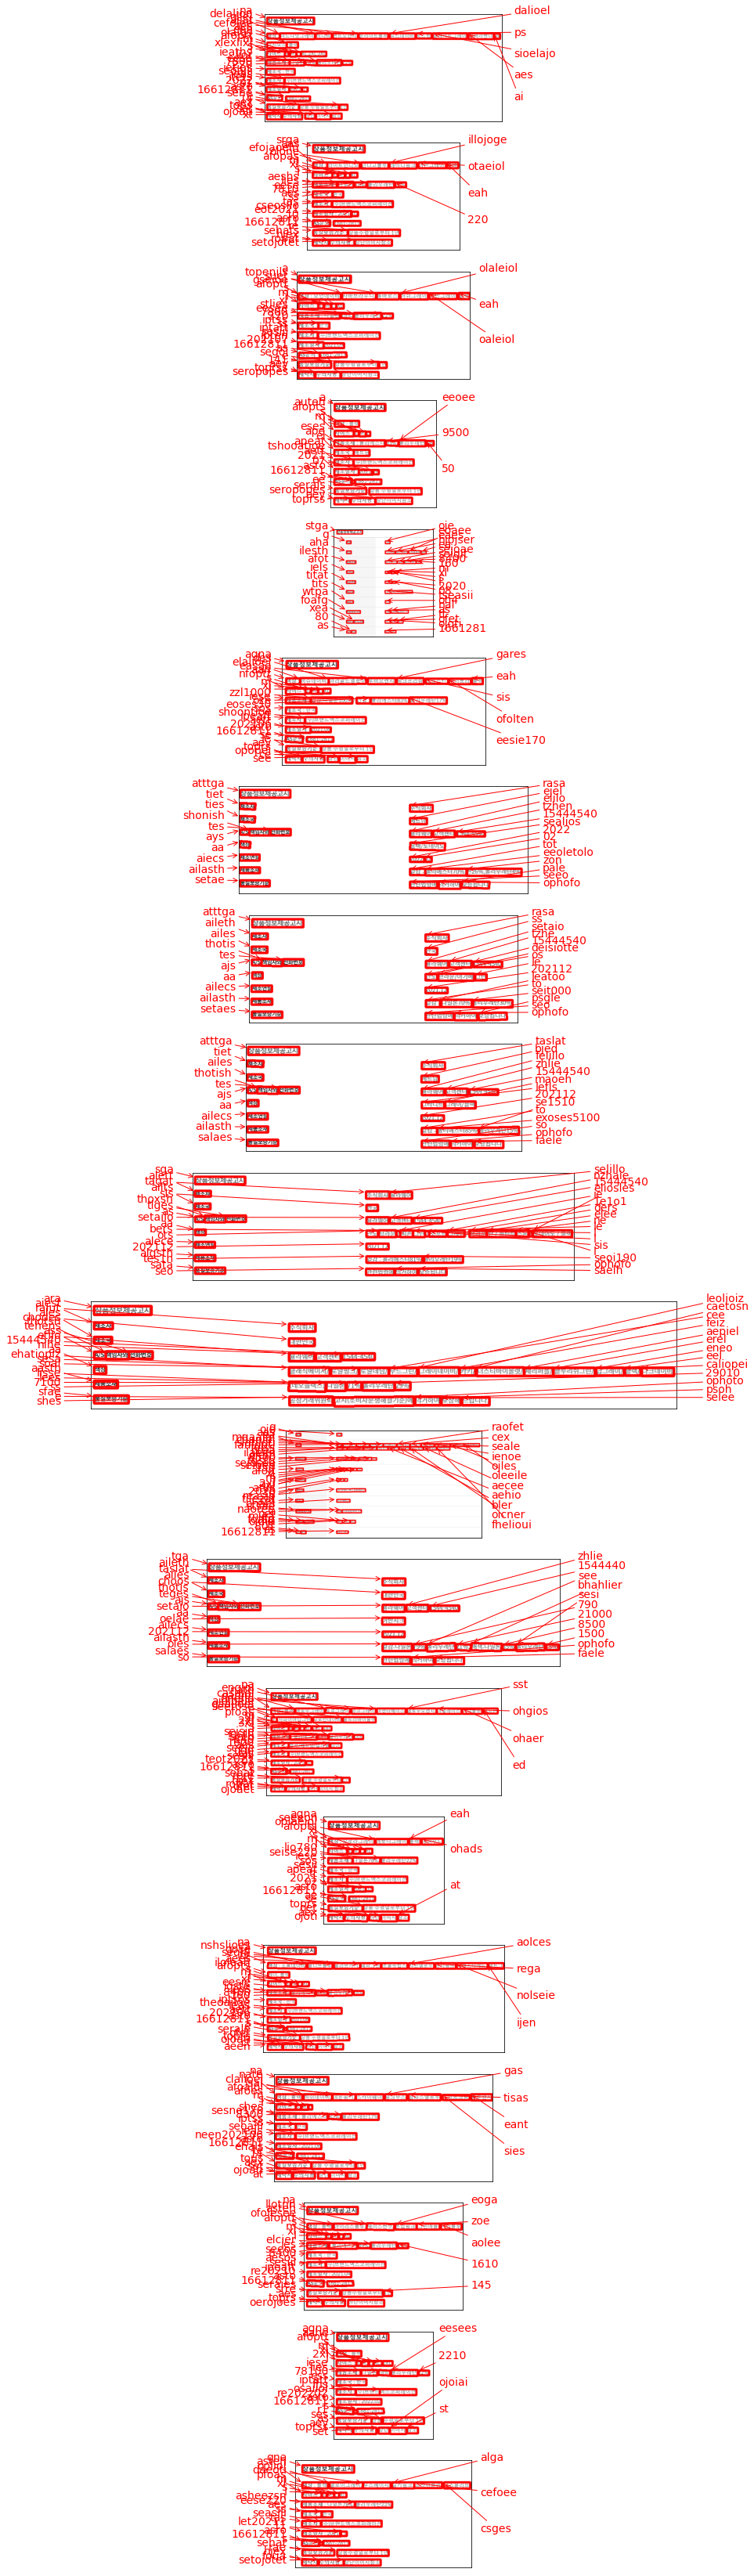

In [9]:
# 인식된 결과 시각화

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(60, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [11]:
# 검출 및 이미지 자르기

import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# 1.  OCR 엔진 모드(–oem):
# 0 - 레거시 엔진 전용.
# 1 - 신경망 LSTM 엔진 전용.
# 2 - 레거시 + LSTM 엔진.
# 3 - 사용 가능한 항목을 기반으로 한 기본값입니다.

# 2. 페이지 분할 모드(–psm):
# 0 - 방향 및 스크립트 감지(OSD) 전용.
# 1 - OSD를 사용한 자동 페이지 분할.
# 2 - 자동 페이지 분할이지만 OSD 또는 OCR은 없습니다.
# 3 - 완전 자동 페이지 분할이지만 OSD는 없습니다. (기본)
# 4 - 가변 크기의 단일 텍스트 열을 가정합니다.
# 5 - 세로로 정렬된 텍스트의 균일한 단일 블록을 가정합니다.
# 6 - 하나의 균일한 텍스트 블록을 가정합니다.
# 7 - 이미지를 단일 텍스트 줄로 취급합니다.
# 8 - 이미지를 한 단어로 취급합니다.
# 9 - 이미지를 원 안의 한 단어로 취급합니다.
# 10 - 이미지를 단일 문자로 취급합니다.
# 11 - 희소 텍스트. 특정 순서 없이 가능한 한 많은 텍스트를 찾습니다.
# 12 - OSD가 있는 희소 텍스트.
# 13 - 원시 라인. Tesseract 관련 해킹을 우회하여 이미지를 단일 텍스트 줄로 취급합니다.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [15]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test_image'
img_file_path = work_dir + '/test_image10.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요

In [16]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test_image/0000.png
/aiffel/aiffel/ocr_python/test_image/0001.png
/aiffel/aiffel/ocr_python/test_image/0002.png
/aiffel/aiffel/ocr_python/test_image/0003.png
/aiffel/aiffel/ocr_python/test_image/0004.png
/aiffel/aiffel/ocr_python/test_image/0005.png
/aiffel/aiffel/ocr_python/test_image/0006.png
/aiffel/aiffel/ocr_python/test_image/0007.png
/aiffel/aiffel/ocr_python/test_image/0008.png
/aiffel/aiffel/ocr_python/test_image/0009.png
/aiffel/aiffel/ocr_python/test_image/0010.png
/aiffel/aiffel/ocr_python/test_image/0011.png
/aiffel/aiffel/ocr_python/test_image/0012.png
/aiffel/aiffel/ocr_python/test_image/0013.png
/aiffel/aiffel/ocr_python/test_image/0014.png
/aiffel/aiffel/ocr_python/test_image/0015.png
/aiffel/aiffel/ocr_python/test_image/0016.png
/aiffel/aiffel/ocr_python/test_image/0017.png
/aiffel/aiffel/ocr_python/test_image/0018.png
/aiffel/aiffel/ocr_python/test_image/0019.png
/aiffel/aiffel/ocr_python/test_image/0020.png
/aiffel/aiffel/ocr_python/test_ima

● 잘린 이미지에서 단어 인식하기

In [17]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(  #검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나온다.
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

ARS AAAS AAI

MAS

P}O|=

SIC]

a,

SIC} at

——

ojos.

} St

12/0],

2s

APO] ~ : S.

:

Mi, Lb, AL

AS A AG

-

LS=

18%,

So) qer

22%

AAs: ota

KAS At :

(Sw owA

= ih

El

“4

Xj 2 SS At

-

2071.10

ASz 2]

-

1661-2811

Se hSJixz

See sasterb

144

AEF Al

— Ol AF St :

AF

Eto|O|

Al AFH

Done


### Step3.테스트 결과 정리

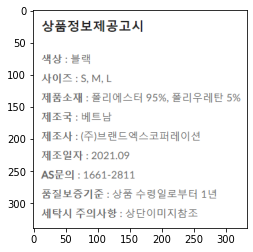

In [23]:
# 테스트 이미지 확인
test_image_path = os.getenv('HOME')+'/aiffel/ocr_python/test_image/test_image12.png'
img_bgr = cv2.imread(test_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
plt.imshow(img_rgb)
plt.show()

#### keras-ocr

<AxesSubplot:>

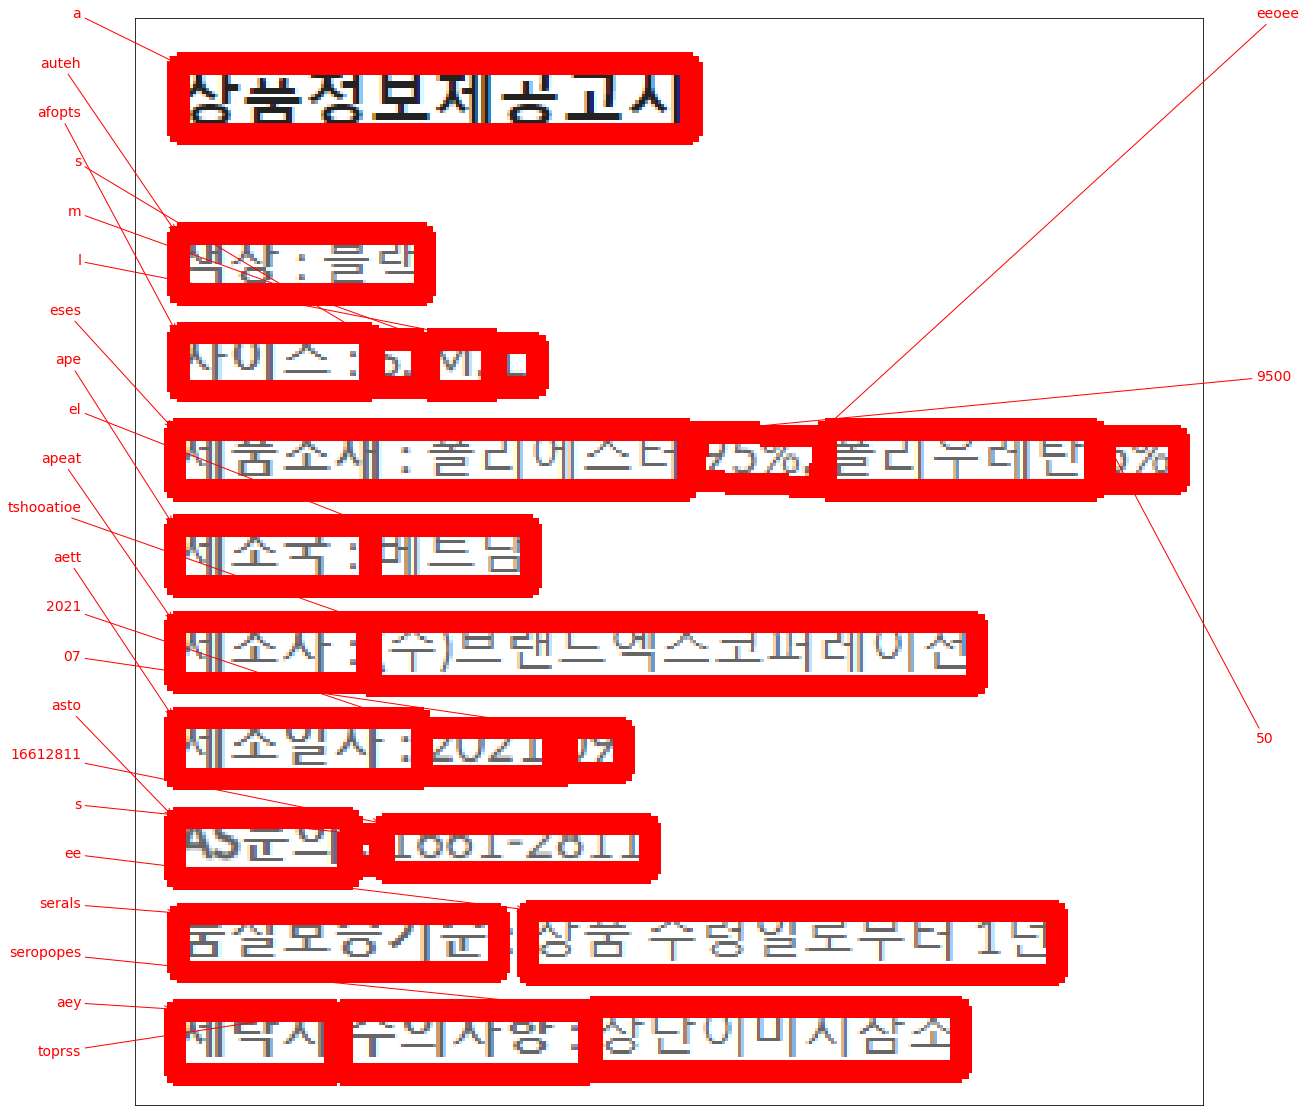

In [27]:
images = [img_rgb]
prediction_groups = [pipeline.recognize([img_rgb])]
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
keras_ocr.tools.drawAnnotations(image=images[0], 
                                    predictions=prediction_groups[0][0], ax=axs)

● keras-ocr은 숫자나 영어는 인식을 잘하지만 한글을 영어로 출력합니다.  
● 영어의 경우 대문자를 소문자로 출력하는 것을 볼 수 있었습니다.  
● 문자의 위치는 잘 인식합니다.  

In [28]:
work_dir2 = os.getenv('HOME')+'/aiffel/ocr_python/test_image'
img_file_path2 = work_dir + '/test_image12.png' 
cropped_image_path_list2 = crop_word_regions(img_file_path2, work_dir2)
recognize_images(cropped_image_path_list2)

/aiffel/aiffel/ocr_python/test_image/0000.png
/aiffel/aiffel/ocr_python/test_image/0001.png
/aiffel/aiffel/ocr_python/test_image/0002.png
/aiffel/aiffel/ocr_python/test_image/0003.png
/aiffel/aiffel/ocr_python/test_image/0004.png
/aiffel/aiffel/ocr_python/test_image/0005.png
/aiffel/aiffel/ocr_python/test_image/0006.png
/aiffel/aiffel/ocr_python/test_image/0007.png
/aiffel/aiffel/ocr_python/test_image/0008.png
/aiffel/aiffel/ocr_python/test_image/0009.png
/aiffel/aiffel/ocr_python/test_image/0010.png
/aiffel/aiffel/ocr_python/test_image/0011.png
/aiffel/aiffel/ocr_python/test_image/0012.png
/aiffel/aiffel/ocr_python/test_image/0013.png
/aiffel/aiffel/ocr_python/test_image/0014.png
/aiffel/aiffel/ocr_python/test_image/0015.png
/aiffel/aiffel/ocr_python/test_image/0016.png
/aiffel/aiffel/ocr_python/test_image/0017.png
/aiffel/aiffel/ocr_python/test_image/0018.png
/aiffel/aiffel/ocr_python/test_image/0019.png
/aiffel/aiffel/ocr_python/test_image/0020.png
/aiffel/aiffel/ocr_python/test_ima

● 해당 이미지에 영어가 거의 없어 한글 인식을 거의 못하지만 숫자는 정확하게 인식하는 것을 확인했다.  

### Step4. 결과 분석과 결론 제시
- 오픈소스의 한계일까? keras-ocr, Tesseract의 결과물은 아쉬웠다.
- 한국어 이미지는 keras-ocr, Tesseract는 인식하지 못하므로 사용할 수 없다.  
- Google OCR API 결제정보 등록 과정에 문제가 있어 시도하지 못했지만 다른 두개의 테스트 방법 보다 더 나은 성능을 보일 것으로 예상된다.  
- keras-ocr의 장점은 텍스트의 위치를 시각화해서 보여준다.  

### OCR 기술을 활용한 레깅스 재활용
- <b>예를들어</b> 버려진 레깅스의 OCR 정보를 활용한다면 레깅스를 새로운 재품군으로 재생산이 가능합니다. 재생산 할 수 있는 제품군으로는 헤어 악세사리 및 또 다른 레깅스, 신축성 소재가 필요한 스포츠 의류가 그 예시 입니다. 여기에는 추가적으로 QR코드 같은 기술이 필요합니다.
- 더 구체적으로 언급하자면 버려진 레깅스 중 재활용 가능한 것들을 분류하는 시간을 상당히 줄여 작업 능률이 향상되고 더불어 재활용 가능한 레깅스의 숫자도 증가할 수 있습니다. 버려진 의류로 인한 환경오염 감소효과를 기대할 수 있습니다.
- 사실 해당 아이디어는 레깅스에 한정되지 않고 모든 의류에 적용될 수 있습니다. 
- 더 나아가 기업의 입장에서 생각해 보면 앞으로 상장된 기업은 ESG 정보 공시의 의무 대상이 되는데 OCR 기술은 지속가능한 경영의 일환으로 사용될 수 있습니다. 의류 산업에 속한 기업은 그 동안 재고를 소각하거나 제3국에 수출해왔는데 이는 탄소 배출을 증가 시키는 요인입니다. 재고를 쓸모 없는 쓰레기로 취급하지 않고 새로운 제품군으로 순환시킨다면 원재료비 감소, 재고 감소, 긍정적인 기업 이미지 등의 효과를 가져올 수 있습니다.    